<a href="https://colab.research.google.com/github/qcesha/Data/blob/main/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/universal_top_spotify_songs.csv")

In [ ]:
print(df.columns)


Index(['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement',
       'weekly_movement', 'country', 'snapshot_date', 'popularity',
       'is_explicit', 'duration_ms', 'album_name', 'album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')


In [ ]:
df.head()


,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,1,1,0,NaN,2025-06-11,95,False,...,2,-6.141,1,0.0600,0.704000,0.000007,0.0550,0.391,168.115,3
1,42UBPzRMh5yyz0EDPr6fr1,Manchild,Sabrina Carpenter,2,-1,48,NaN,2025-06-11,89,True,...,7,-5.087,1,0.0572,0.122000,0.000000,0.3170,0.811,123.010,4
2,0FTmksd2dxiE5e3rWyJXs6,back to friends,sombr,3,0,1,NaN,2025-06-11,98,False,...,1,-2.291,1,0.0301,0.000094,0.000088,0.0929,0.235,92.855,4
3,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",4,0,-1,NaN,2025-06-11,91,False,...,6,-7.727,0,0.0317,0.289000,0.000000,0.1260,0.498,157.964,3
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5,1,0,NaN,2025-06-11,100,False,...,2,-10.171,1,0.0358,0.200000,0.060800,0.1170,0.438,104.978,4


In [ ]:
print(df.shape)
print(df.info())
print(df.isna().sum())


(2110316, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110316 entries, 0 to 2110315
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   spotify_id          object 
 1   name                object 
 2   artists             object 
 3   daily_rank          int64  
 4   daily_movement      int64  
 5   weekly_movement     int64  
 6   country             object 
 7   snapshot_date       object 
 8   popularity          int64  
 9   is_explicit         bool   
 10  duration_ms         int64  
 11  album_name          object 
 12  album_release_date  object 
 13  danceability        float64
 14  energy              float64
 15  key                 int64  
 16  loudness            float64
 17  mode                int64  
 18  speechiness         float64
 19  acousticness        float64
 20  instrumentalness    float64
 21  liveness            float64
 22  valence             float64
 23  tempo               float64
 24  time_signa

Пропусков в колонке name, artists, album_name незначительное количество их можно просто удалить. В album_release_date это важно для временного анализа, и чтобы данные были похожи, просто удалим пропуски здесь. В country можем просто заменить на "unknown", так как уже значительное количество данных.

In [ ]:
# Заменяем пропущенные значения в 'country' на 'unknown'
df['country'] = df['country'].fillna('unknown')

# Удаляем строки, где нет даты релиза
df = df.dropna(subset=['album_release_date'])

# Удаляем строки с пропущенными значениями в 'name' или 'album_name'
df = df.dropna(subset=['name', 'album_name']).copy()

# Преобразуем в datetime
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')



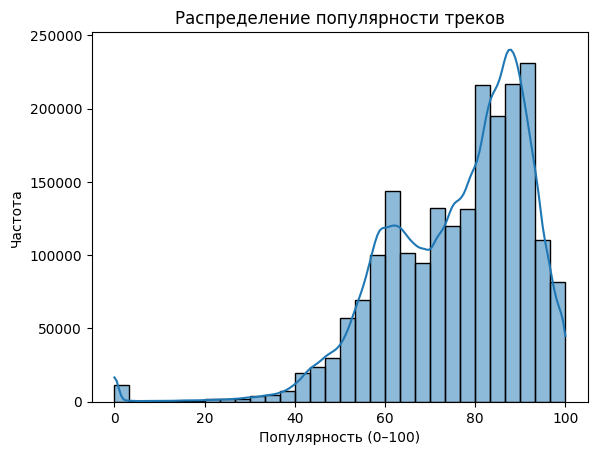

In [ ]:
sns.histplot(df['popularity'], kde=True, bins=30)
plt.title("Распределение популярности треков")
plt.xlabel("Популярность (0–100)")
plt.ylabel("Частота")
plt.show()


Распределение неравномерное и скошено влево — большинство треков имеют популярность от 60 до 90. Наиболее высокая плотность — в районе 70–90 — это говорит о том, что в чартах преобладают треки средней и высокой популярности.

In [ ]:
# Создаем колонку 'duration_min'
df['duration_min'] = df['duration_ms'] / 60000

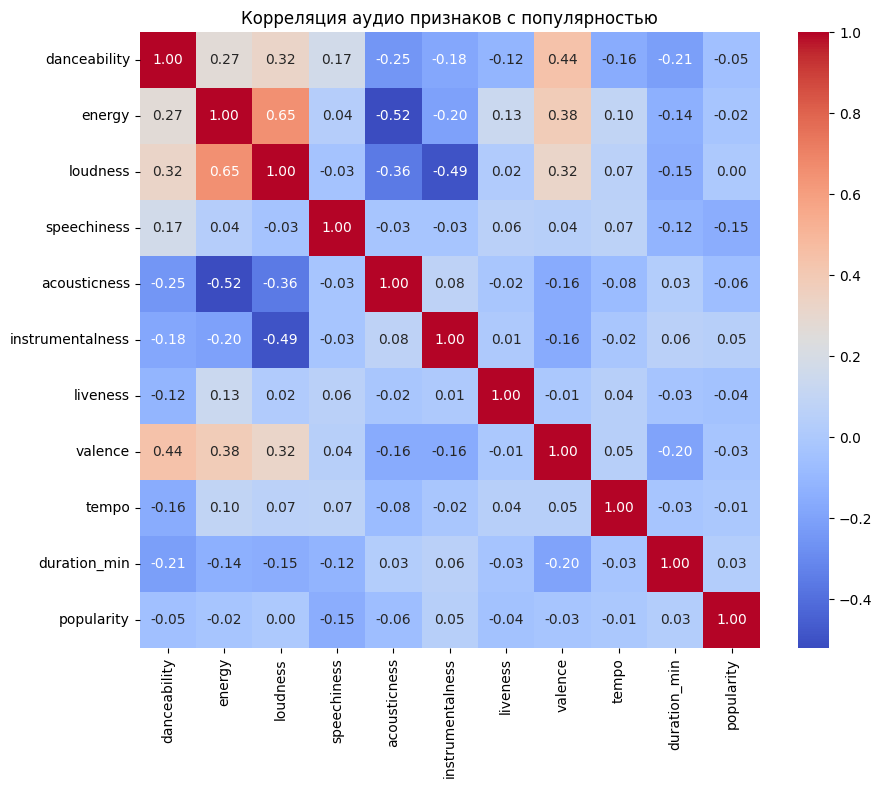

In [ ]:
audio_feats = ['danceability', 'energy', 'loudness', 'speechiness',
               'acousticness', 'instrumentalness', 'liveness',
               'valence', 'tempo', 'duration_min']

corr = df[audio_feats + ['popularity']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляция аудио признаков с популярностью")
plt.show()


Аудио-характеристики, такие как "энергичность", "танцевальность", "весёлость" и т.д. почти не определяют популярность напрямую. Популярность, вероятно, определяется более внешними факторами:
страна, дата, тренды, исполнители, продвижение, чарты и т.д.



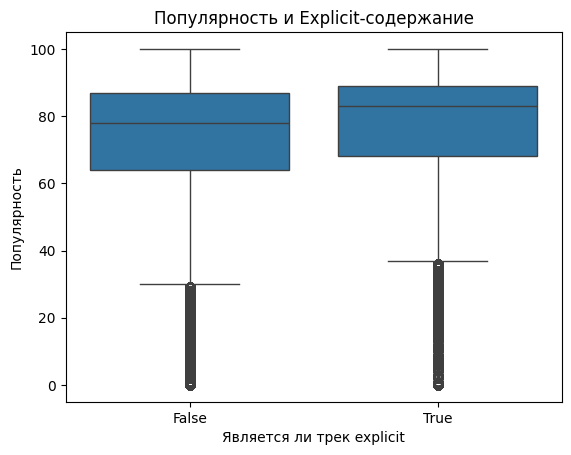

In [ ]:
sns.boxplot(x='is_explicit', y='popularity', data=df)
plt.title("Популярность и Explicit-содержание")
plt.xlabel("Является ли трек explicit")
plt.ylabel("Популярность")
plt.show()


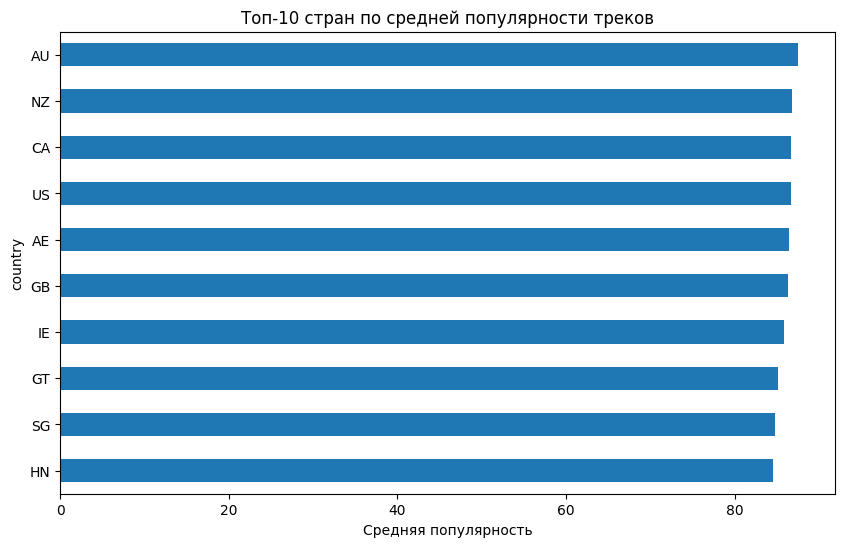

In [ ]:
top_countries = (
    df[df["country"] != "unknown"]
    .groupby("country")["popularity"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_countries.plot(kind='barh', figsize=(10,6))
plt.title("Топ-10 стран по средней популярности треков")
plt.xlabel("Средняя популярность")
plt.gca().invert_yaxis()
plt.show()



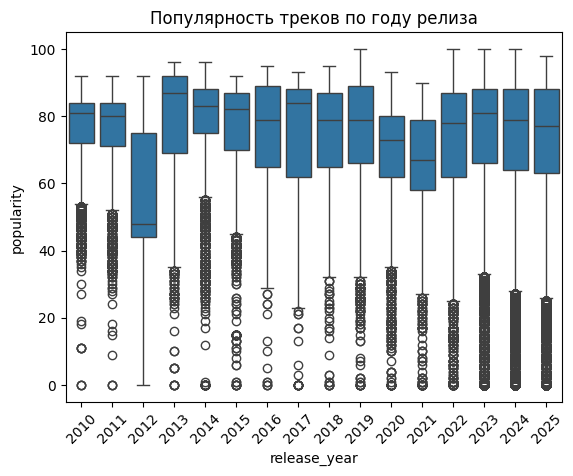

In [ ]:
df['release_year'] = df['album_release_date'].dt.year
sns.boxplot(x='release_year', y='popularity', data=df[df['release_year'] >= 2010])
plt.xticks(rotation=45)
plt.title("Популярность треков по году релиза")
plt.show()


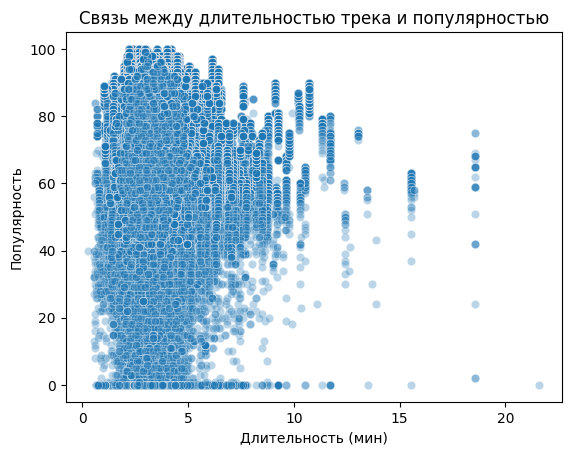

In [ ]:
sns.scatterplot(x='duration_min', y='popularity', data=df, alpha=0.3)
plt.title("Связь между длительностью трека и популярностью")
plt.xlabel("Длительность (мин)")
plt.ylabel("Популярность")
plt.show()


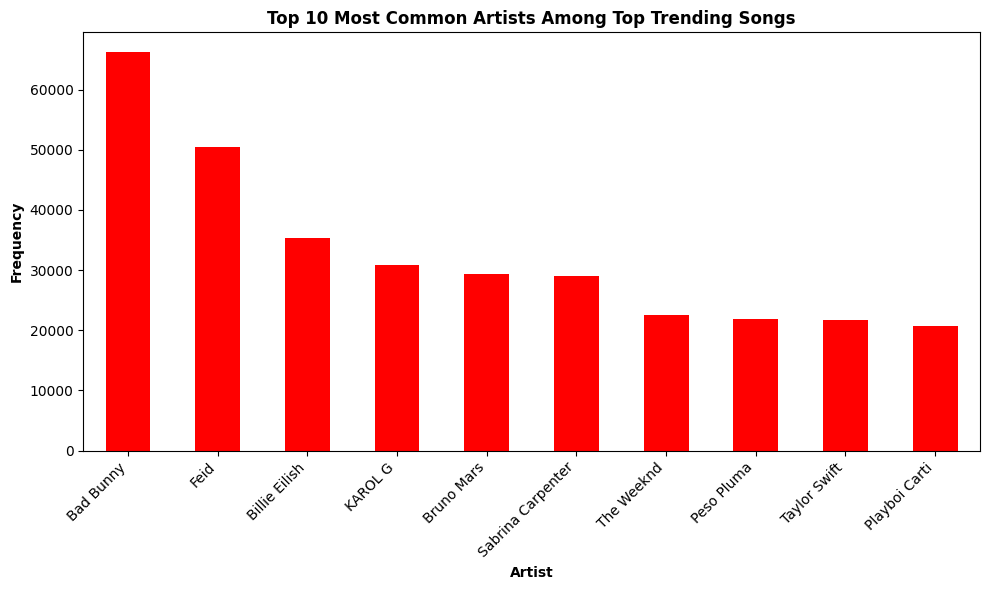

In [7]:
artists_list = df['artists'].str.split(', ').explode()

# Count the occurence of each artist
artists_count = artists_list.value_counts()

# Top 10 most common artists
top_artists = artists_count.head(10)

# Plotting the chart
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='red')
plt.title('Top 10 Most Common Artists Among Top Trending Songs',fontweight='bold')
plt.xlabel('Artist', fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



---



Feature Engineering. Корреляция новых колонок с таргетом. Feature Importances. Простая модель.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


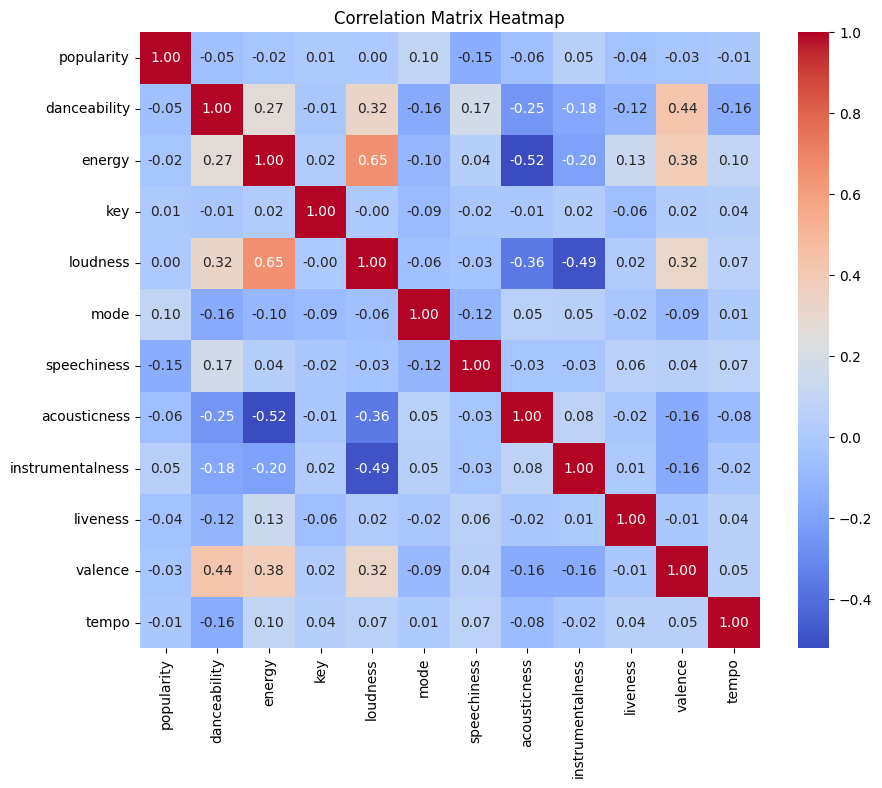

In [15]:
mat_col = [
    'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo'
]

# Строим корреляционную матрицу
corr_mat = df[mat_col].corr()

# Визуализируем
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
import numpy as np

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    lower = quartile1 - 1.5 * iqr
    upper = quartile3 + 1.5 * iqr
    return lower, upper

def check_outlier(dataframe, col_name):
    lower, upper = outlier_thresholds(dataframe, col_name)
    return dataframe[(dataframe[col_name] < lower) | (dataframe[col_name] > upper)].any(axis=None)

In [17]:
for col in mat_col:
    print(f"{col:18} → {check_outlier(df, col)}")

popularity         → False
danceability       → False
energy             → False
key                → False
loudness           → True
mode               → False
speechiness        → True
acousticness       → False
instrumentalness   → True
liveness           → True
valence            → False
tempo              → False


In [18]:
out_col = ['loudness', 'speechiness', 'instrumentalness', 'liveness']

#Находим границы по IQR
q1 = df[out_col].quantile(0.05)
q3 = df[out_col].quantile(0.95)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

#Удаляем строки, где есть хотя бы один выброс
condition = ~((df[out_col] < lower) | (df[out_col] > upper)).any(axis=1)
df_cleaned = df[condition].copy()

# Проверяем результат
print(" Исходная форма:", df.shape)
print(" После удаления выбросов:", df_cleaned.shape)


 Исходная форма: (2110316, 25)
 После удаления выбросов: (2028678, 25)


In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

# Определим числовые признаки и целевую переменную
mat_col = [
    'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo'
]

features = df[mat_col].drop(['popularity'], axis=1)
target = df['popularity']

# Применяем SelectKBest с ANOVA F-статистикой
k_best = SelectKBest(score_func=f_classif, k=7)
X = k_best.fit_transform(features, target)

# Сохраняем имена и оценки признаков
feature_scores = k_best.scores_
feature_info = list(zip(features.columns, feature_scores))

# Сортируем по значимости
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)

# Выводим топ-10
print("Топ признаков по значимости (f_classif):")
for feature_name, feature_score in sorted_feature_info[:10]:
    print(f"{feature_name}: {feature_score:.2f}")


Топ признаков по значимости (f_classif):
speechiness: 660.09
loudness: 597.71
mode: 324.94
valence: 312.97
energy: 292.91
instrumentalness: 270.00
acousticness: 251.21
danceability: 223.44
liveness: 124.23
tempo: 84.65


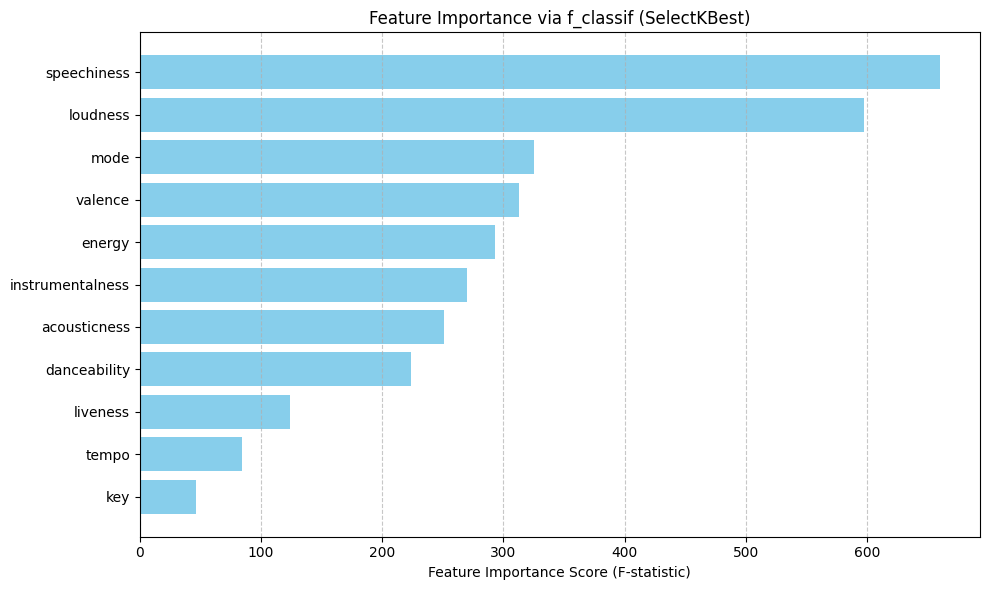

In [20]:
import matplotlib.pyplot as plt

# Распаковываем отсортированные данные (все признаки)
feature_names, feature_scores = zip(*sorted_feature_info)

# Визуализация
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_scores, color="skyblue")
plt.xlabel("Feature Importance Score (F-statistic)")
plt.title("Feature Importance via f_classif (SelectKBest)")
plt.gca().invert_yaxis()  # Самые важные — сверху
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

features_cleaned = df_cleaned[mat_col].drop(['popularity'], axis=1)
target_cleaned = df_cleaned['popularity']

# SelectKBest снова — обучаем на очищенных данных
k_best_cleaned = SelectKBest(score_func=f_classif, k=7)
X_selected = k_best_cleaned.fit_transform(features_cleaned, target_cleaned)

# Получаем индексы и имена признаков
selected_indices = k_best_cleaned.get_support(indices=True)
selected_features_df = features_cleaned.iloc[:, selected_indices]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    selected_features_df, target_cleaned, test_size=0.2, random_state=42
)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Линейная регрессия
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)

# Метрики
print(f"MAE:  {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R²:   {r2_score(y_test, y_pred):.4f}")


MAE:  12.0271
RMSE: 15.2595
R²:   0.0597


In [27]:
# 1. Возьми очищенный датафрейм
df_sample = df_cleaned.sample(n=100_000, random_state=42)

# 2. Отбор признаков (лучше 7 по f_classif или другие)
mat_col = [
    'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo'
]

features = df_sample[mat_col].drop(['popularity'], axis=1)
target = df_sample['popularity']

# 3. Стандартизация и разделение
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Модели и обучение
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=50, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, max_depth=5, random_state=42, verbosity=0, n_jobs=-1)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append((name, mae, rmse, r2))

# 5. Вывод результатов
print(" Сравнение моделей:")
print("{:<20} {:<10} {:<10} {:<10}".format("Model", "MAE", "RMSE", "R2"))
for name, mae, rmse, r2 in results:
    print(f"{name:<20} {mae:<10.2f} {rmse:<10.2f} {r2:<10.4f}")


 Сравнение моделей:
Model                MAE        RMSE       R2        
LinearRegression     12.00      15.22      0.0596    
RandomForest         7.50       10.89      0.5182    
GradientBoosting     9.17       12.37      0.3783    
XGBoost              7.42       10.89      0.5181    


In [28]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neural_network import MLPRegressor
import numpy as np

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=50, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, max_depth=5, random_state=42, verbosity=0, n_jobs=-1),
    "MLP": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=200, random_state=42)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_cv = {}

for name, model in models.items():
    print(f"Cross-validating {name}...")
    scores = cross_val_score(model, features, target, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1)
    mean_rmse = -np.mean(scores)
    std_rmse = np.std(scores)
    results_cv[name] = (mean_rmse, std_rmse)

print(f"\nCV results (RMSE):")
for name, (mean_rmse, std_rmse) in results_cv.items():
    print(f"{name:<15} Mean RMSE: {mean_rmse:.3f} ± {std_rmse:.3f}")


Cross-validating LinearRegression...
Cross-validating RandomForest...
Cross-validating GradientBoosting...
Cross-validating XGBoost...
Cross-validating MLP...

CV results (RMSE):
LinearRegression Mean RMSE: 15.254 ± 0.046
RandomForest    Mean RMSE: 10.857 ± 0.036
GradientBoosting Mean RMSE: 12.369 ± 0.035
XGBoost         Mean RMSE: 10.895 ± 0.035
MLP             Mean RMSE: 13.967 ± 0.122
